Test behavior in mass ratio and fillout factor for low mass ratio systems based on Andrej's remark that for low q, FF should be poorly determined. It doesn't seem to be the case here, but we're not going low enough in q: only up to 0.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pickle

In [2]:
from sklearn.neighbors import NearestNeighbors as NN

def interp_nearest(lc_test, lc_db, nn=50):
    nbrs = NN(n_neighbors=nn).fit(lc_db)
    ds_0, inds_0 = nbrs.kneighbors(lc_test)
    ws = (1./ds_0)**2
    fs=(1./np.sum(ws,axis=1))
    weights=ws*fs[:,np.newaxis]
    return ds_0, inds_0, weights

In [3]:
cb_database = np.load('contact/cb_database.npy')
cb_database_params = np.loadtxt('contact/cb_database_params.dat')
cb_test = np.load('contact/cb_test.npy')
cb_test_params = np.loadtxt('contact/cb_test_params.dat')

In [4]:
cb_param_names = ['incl', 'tratio', 'ff', 'q']

### nearest-neighbors interpolation

In [5]:
cb_ds, cb_inds, cb_ws = interp_nearest(cb_test, cb_database, nn=10)

In [6]:
cb_params_interp = np.array([np.sum(cb_database_params[:,i][cb_inds]*cb_ws,axis=1) for i in range(0, len(cb_database_params[0]))]).T
cb_params_min = np.array([np.min(cb_database_params[:,i][cb_inds],axis=1) for i in range(0, len(cb_database_params[0]))]).T
cb_params_max = np.array([np.max(cb_database_params[:,i][cb_inds],axis=1) for i in range(0, len(cb_database_params[0]))]).T

In [10]:
lowq = np.argwhere(cb_test_params[:,-1]<0.25)

In [77]:
cb_nns_lowq = cb_database[cb_inds][lowq].reshape(5,10,100)

In [87]:
cb_nns_lowq_params = cb_database_params[cb_inds][lowq].reshape(5,10,4)

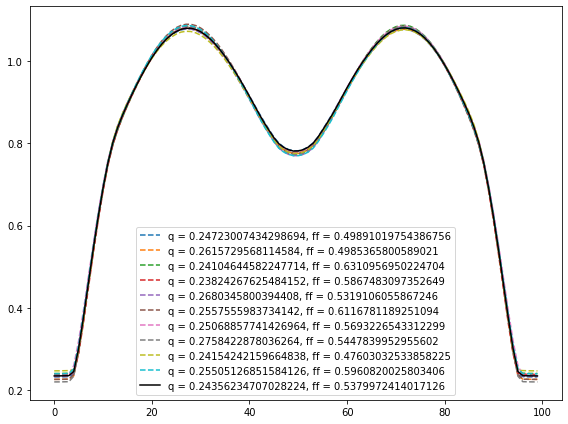

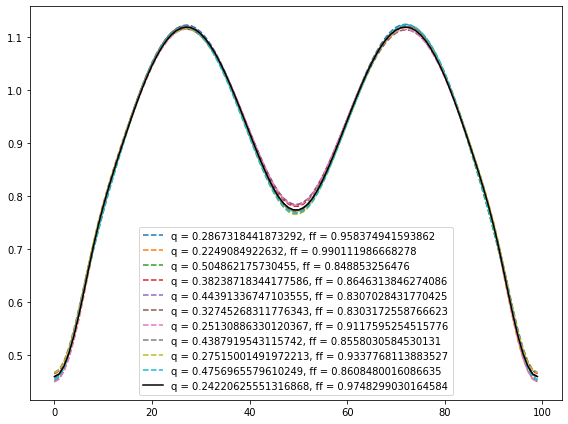

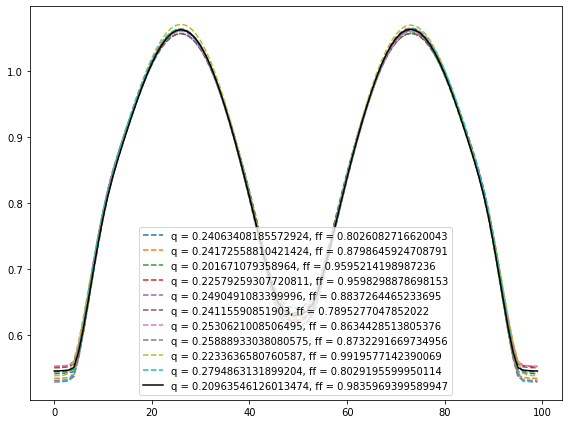

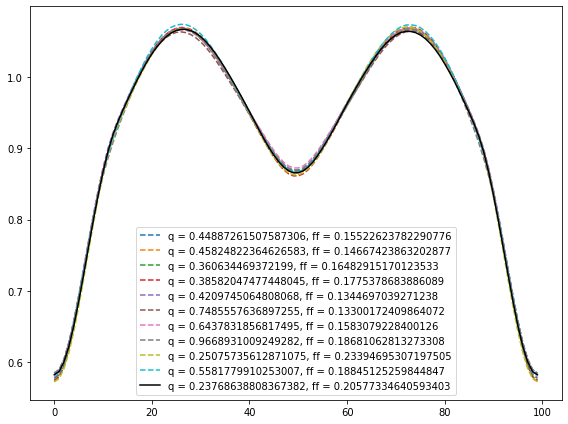

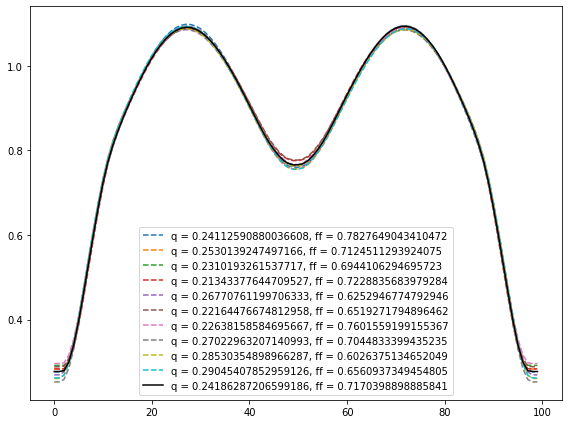

In [91]:
for i,ind in enumerate(lowq):
    plt.figure(figsize=(8,6))
    for j in range(10):
        plt.plot(cb_nns_lowq[i][j], '--', label='q = %s, ff = %s' % (cb_nns_lowq_params[i][j][-1], cb_nns_lowq_params[i][j][-2]))
    plt.plot(cb_test[ind].flatten(), 'k-', label='q = %s, ff = %s' % (cb_test_params[ind][0][-1], cb_test_params[ind][0][-2]))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [93]:
cb_test_params[:,-1].min()

0.20963546126013474

In [94]:
cb_test_params[lowq][-2]

array([[64.59386956,  1.56379994,  0.20577335,  0.23768639]])

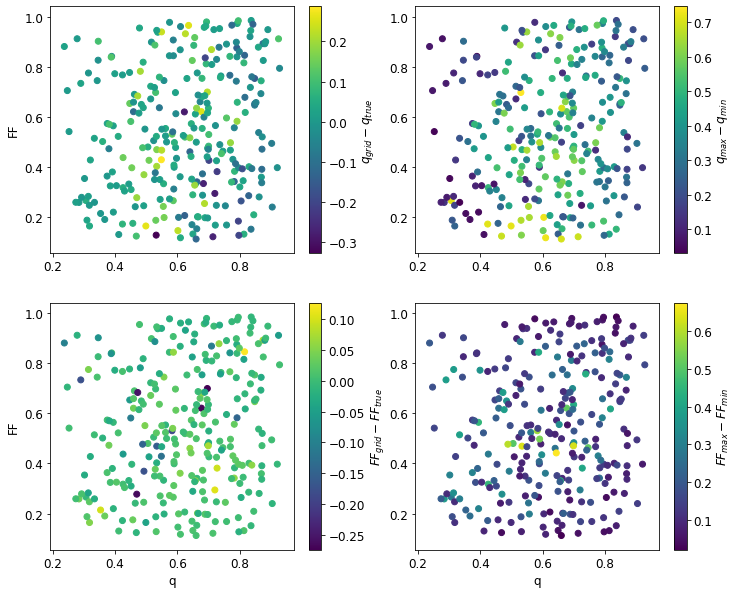

In [118]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
cb1 = axes[0][0].scatter(cb_params_interp[:,-1], cb_params_interp[:,-2], c=cb_params_interp[:,-1]-cb_test_params[:,-1])
cb2 = axes[0][1].scatter(cb_params_interp[:,-1], cb_params_interp[:,-2], c=cb_params_max[:,-1]-cb_params_min[:,-1])
cb3 = axes[1][0].scatter(cb_params_interp[:,-1], cb_params_interp[:,-2], c=cb_params_interp[:,-2]-cb_test_params[:,-2])
cb4 = axes[1][1].scatter(cb_params_interp[:,-1], cb_params_interp[:,-2], c=cb_params_max[:,-2]-cb_params_min[:,-2])
axes[1][0].set_xlabel('q')
axes[1][1].set_xlabel('q')
axes[0][0].set_ylabel('FF')
axes[1][0].set_ylabel('FF')
fig.colorbar(cb1, ax = (axes[0][0],), label='$q_{grid}-q_{true}$')
fig.colorbar(cb2, ax = (axes[0][1],), label='$q_{max}-q_{min}$')
fig.colorbar(cb3, ax = (axes[1][0],), label='$FF_{grid}-FF_{true}$')
fig.colorbar(cb4, ax = (axes[1][1],), label='$FF_{max}-FF_{min}$')